#### Descriptive Statistics in Python

In [1]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt

In [2]:
pd.read_csv("bank_cleaned.csv")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df = pd.read_csv("bank_cleaned.csv")

In [4]:
# df.mean() would give us the mean of each of the columns
# df.mean(axis = 1) would give us the mean of each row
# df.median() similarly would give us the median of each column
# df.median(axis = 1) would give us - you guessed it - the median of each row
# Now, given the dataset that we loaded, it'll throw errors because you can't get the mean of "cellular" in the concact column, for example
# We'd have to pass a specific column if we were looking to do that.
# df.mode() will give us the most occurring entry in a set.  If there's a tie, it'll turn up multiple entries

# These are "measures of center" - i.e. looking for a central value

age = df["age"] # pulling out the age column as an example
age.mean()

np.float64(41.17009511170095)

In [5]:
# Measures of spread
# These measure the typical variance from the central values, in essence
# For example, the range is going to measure the difference between the maximum and minimum values

# Range calc
max(df["age"]) - min(df["age"])

68

In [6]:
# So the median represents the 50th percentile in a dataset
# A summary of several percentiles can be used to describe spread, we can use the .quantile function to break these out

five_num = [age.quantile(0),     # This is also the min
            age.quantile(0.25),
            age.quantile(0.50),
            age.quantile(0.75),
            age.quantile(1)]     # This is also the max
five_num

[np.float64(19.0),
 np.float64(33.0),
 np.float64(39.0),
 np.float64(49.0),
 np.float64(87.0)]

In [7]:
# Now we have the min/max as well as the median and the quartiles.  
# These are so common that they're included in the .describe function, so we can actually easily get these by using that

age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [8]:
# The inter-quartile range is the distance between the first and third quartiles
# This gives us a generally good idea of the range of the bulk of the data

age.quantile(0.75) - age.quantile(0.25)

np.float64(16.0)

In [9]:
# Two other measures of spread are variance and standard distribution
# The variance is the average of the squared differences from the mean
# So, find the mean.  Take every value, subtract it from the mean, square it, and then find the average of those values.

age.var()

np.float64(111.85623824316416)

In [10]:
# The Standard Distribution is the square root of the variance.  Since it's expressed in the same units as the base set, it's a bit more manageable

age.std()

np.float64(10.576210958711261)

In [11]:
# Note that since these are both based on the mean, they're susceptible to the same skewing by outliers that the mean is.

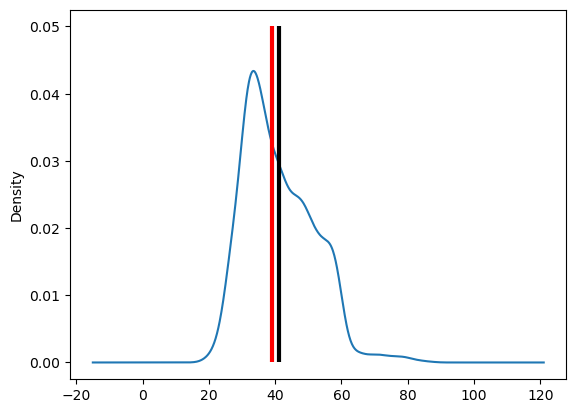

In [16]:
# Let's try plotting this stuff

age.plot(kind = "density");

plt.vlines(df["age"].mean(),      # Plot the mean!
           ymin = 0.0,
           ymax = 0.05,
           linewidth=3.0,
           color = "black");

plt.vlines(df["age"].median(),    # Plot the median, but red
           ymin = 0.0,
           ymax = 0.05,
           linewidth=3.0,
           color = "red");